### ***Overview***

We have data of 50 Startups operating in United States of America and the data used in this notebook obtained from Kaggle. Dataset contain several variables, which ar as follows:

- R&D Spend - Amount spent by startup in Research and Development wing (in 1000s).
- Administration - Amount spent by startup in Adminstration wing (in 1000s).
- Marketing Spend - Amount spent by startup in Marketing wing (in 1000s).
- State - State in which startup is operating.
- Profit - Profit made by the startup (in 1000s).

### ***Objective***

First objective of this project (notebook) is to predict the profit of Startups based upon certain factors like R&D Spend, Administration Spend, Marketing Spend and State in which theey are operating.

Second objective is to determine which in which company should operate in order to maximize their Profit.

### ***Import Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### ***Loading Dataset***

In [2]:
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#shape of dataset
df.shape

(50, 5)

In [4]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#checking for missing data
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

there is no missing values in data

In [6]:
#description about data
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### ***Visualising dataset***

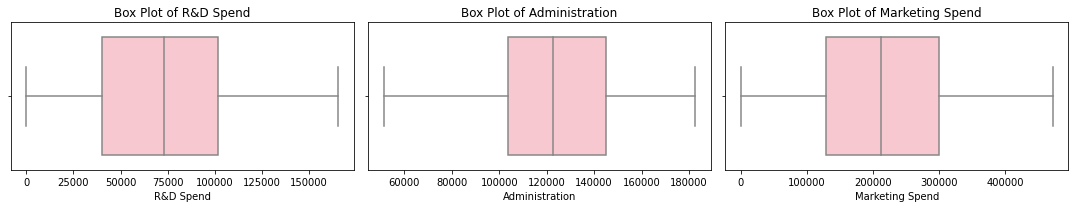

In [8]:
#boxplot of independent variable
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
  plt.subplot(1,4,i)
  sns.boxplot(x=col,data=df,color='pink')
  plt.title(f'Box Plot of {col}')
  plt.tight_layout()

it seems that there is no outliers

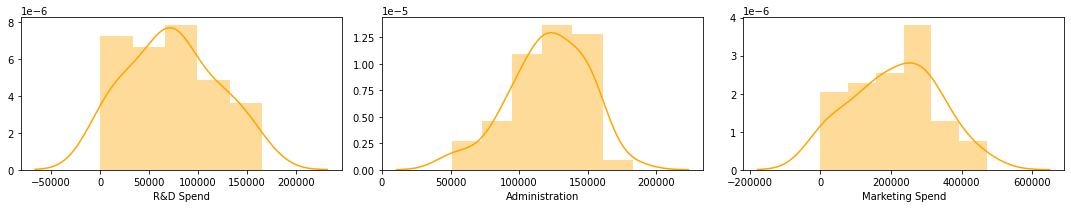

In [9]:
#distribution plot of independent variable
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
  plt.subplot(1,4,i)
  sns.distplot(a=df[col],color='orange')
  plt.tight_layout()

it seems all the variables are normally distributed

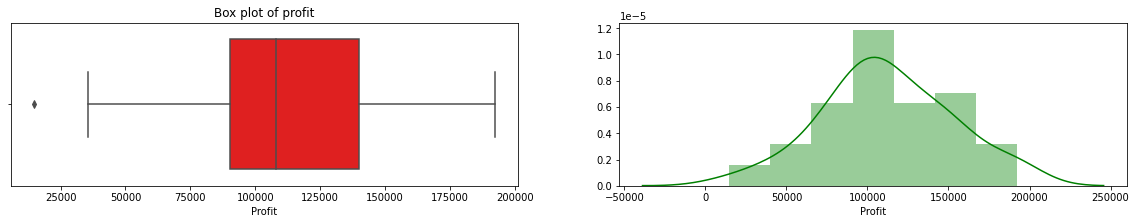

In [10]:
#box plot and distributin plot of dependent variable 
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.Profit,color = 'red')
plt.title('Box plot of profit')

plt.subplot(1,2,2)
sns.distplot(a=df.Profit, color='green')

In [11]:
#This is the outlier, since we see blow the R&D is higly correlated to the Proft
#Here R&D spend is zero so its obious the profit is very low for this startup
df[df['Profit']<25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [13]:
df[df['R&D Spend']<10000]

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [14]:
#After observing above few startup data, We can say that for Index 49 (which is Outlier) there is some error in Profit
#typo error maybe. Since Profit for other startups with very R&D Spend is much higher than this
#We will be removing the outlier from the dataset
df.drop(index=49,axis=0,inplace=True)
df.shape

(49, 5)

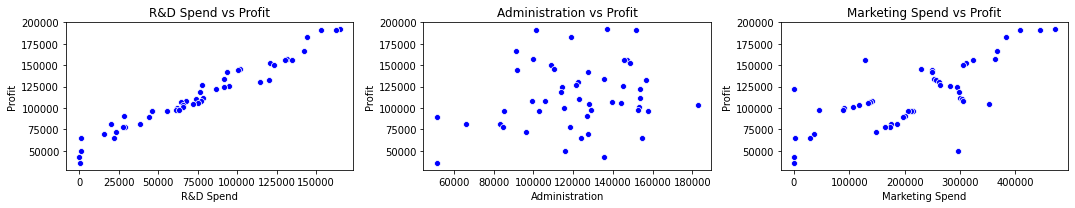

In [15]:
#Distribution Plot of independent variables an it seems  all variables are Normally distributed.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.scatterplot(x=col,y='Profit',data=df,color='blue')
    plt.title(f"{col} vs Profit")
    plt.tight_layout()

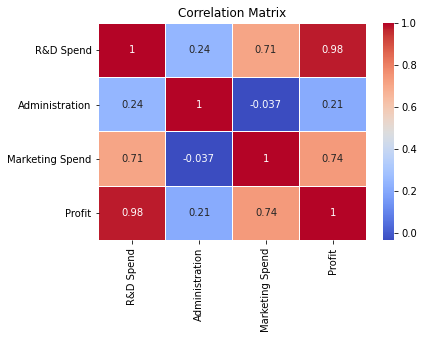

In [16]:
#we can see that R&D is highly linearly correalted with Profit
#let us look at correlation matrix
plt.title("Correlation Matrix")
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',linewidths=0.1)

We can see that R&D Spend and Marketing Spend are 0.98 and 0.75 correlated with Profit which is very high.

And Adminstration Spend is very less correlated, so we can drop that feature for buliding model.

Also, we can see that R&D and Marketing are correlated with 0.72 which is high => Multicollinearity in independent variables.

**We cannot have Multicollinearity in the dataset**

Text(0.5, 1.0, 'R&D Spend vs Marketing Spend')

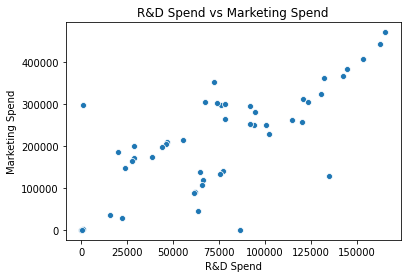

In [17]:
#This shows linear relationship between R&D Spend and Marketing Spend
sns.scatterplot(x='R&D Spend',y='Marketing Spend',data=df)
plt.title("R&D Spend vs Marketing Spend")

In [18]:
df1 = df.copy()
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### ***Wrangling Dataset***

In [19]:
#droping column Marketing Spend (because of Multicollinearity with R&D Spend) 
#droping column Adminstration(because of very low correlation with Proft)
df2 = df1.drop(columns=['Marketing Spend','Administration'],axis=1)
df2.head()

,R&D Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94


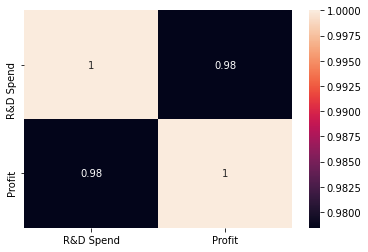

In [20]:
sns.heatmap(df2.corr(),annot=True)

In [21]:
#we have one Catgorical variable column also 'State'
#Lets explore and analyse it

df2.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [22]:
df.State.value_counts()

New York      17
California    16
Florida       16
Name: State, dtype: int64

In [23]:
#We will convert this column into dummy variables
df3 = pd.get_dummies(data=df2)
df3.head()

,R&D Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,192261.83,0,0,1
1,162597.70,191792.06,1,0,0
2,153441.51,191050.39,0,1,0
3,144372.41,182901.99,0,0,1
4,142107.34,166187.94,0,1,0


In [24]:
#To avoid dummy variable Trap, we will drop one dummy variable. Let us remove State_California
df4 = df3.drop(labels=['State_California'],axis=1)
df4.head()

,R&D Spend,Profit,State_Florida,State_New York
0,165349.20,192261.83,0,1
1,162597.70,191792.06,0,0
2,153441.51,191050.39,1,0
3,144372.41,182901.99,0,1
4,142107.34,166187.94,1,0


### ***Spliting dataset into train and test set***

In [25]:
#Now will split our dataset into Dependent variable and Independent variable

X = df4.iloc[:,[0,2,3]].values
y = df4.iloc[:,1].values

In [26]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (49, 3)
Shape of Independent Variable y = (49,)


In [27]:
#Now we will spit our data into Train set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

In [28]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (39, 3)
Shape of X_test = (10, 3)
Shape of y_train = (39,)
Shape of y_test = (10,)


### ***Building Linear Regression Model***

In [29]:
#Now we will build regression model on Training Set and Test it on our Test Set

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#Now it's time to test the accuracy of the model on our Test Data
#this is very good accuracy on training set
lm.score(X_train,y_train)

0.9627751272930376

### ***Model Evaluation***

In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lm,X_train,y_train,cv=5)
print(f"Accuracies obtained from 5-cross validation = {accuracies}")
print(f'Mean of all accuracies = {accuracies.mean()}')
print(f"Standard Deviation of accuracies = {accuracies.std()}")

Accuracies obtained from 5-cross validation = [0.92253207 0.91428495 0.96311516 0.97224433 0.96787827]
Mean of all accuracies = 0.9480109545008517
Standard Deviation of accuracies = 0.02448150764411361


In [32]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=lm,param_grid={'normalize':[True,False]})
grid_search = grid_search.fit(X_train,y_train)
print(f"Best Parameter for our model is {grid_search.best_params_}")
print(f"Best score for the model is {grid_search.best_score_}")

Best Parameter for our model is {'normalize': True}
Best score for the model is 0.9480109545008595


In [33]:
# Taking best parameter
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [34]:
#Now it's time to test the accuracy of the model on our Test Data
#this is very good accuracy on training set
lm.score(X_train,y_train)

0.9627751272930376

In [35]:
#Since we have already taken best parameter for our linear model.
#Now we can see how model performs on test dataset
y_pred = lm.predict(X_test)
data = {'y_test':y_test,'y_pred':y_pred.round(2)}
pd.DataFrame(data=data)

,y_test,y_pred
0,90708.19,73382.98
1,110352.25,112267.38
2,118474.03,114900.98
3,81229.06,63833.66
4,124266.90,127497.13
5,191792.06,188966.03
6,64926.08,47338.87
7,111313.02,113722.74
8,126992.93,116410.05
9,49490.75,49923.83


In [36]:
#coefficients of regression model
coeff = f'Profit = ({lm.intercept_} x Bias) '
for i,col in zip(range(3),df4.columns[[0,2,3]]):
    coeff+=f'+\n ({lm.coef_[i]} x {col}) '

print(coeff)

Profit = (49491.02605458812 x Bias) +
 (0.8577919938064326 x R&D Spend) +
 (-695.5899394338661 x State_Florida) +
 (-3010.146506460362 x State_New York) 


Text(0, 0.5, 'Residues')

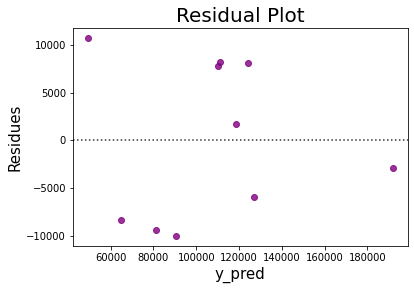

In [37]:
plt.title('Residual Plot',size=20)
sns.residplot(y_test,y_pred,color='purple')
plt.xlabel('y_pred',size=15)
plt.ylabel('Residues',size=15)

#we can not see any pattern in the plot => model is good

Text(0, 0.5, 'y_pred')

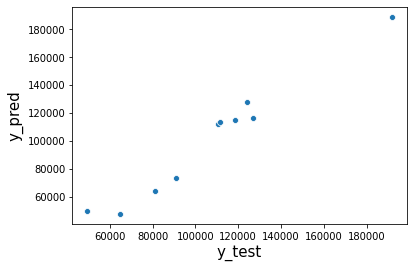

In [39]:
sns.scatterplot(y_test,y_pred)
plt.xlabel('y_test',size=15)
plt.ylabel('y_pred',size=15)

### ***Interpreting Results***

In [40]:
from sklearn import metrics
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'R^2 = {r2}')
Profit = (49491.02605458812 x Bias) +
 (0.8577919938064326 x R&D Spend) +
 (-695.5899394338661 x State_Florida) +
 (-3010.146506460362 x State_New York) print(f'Adjusted R^2 = {adj_r2}')

R^2 = 0.9242380072119282
Adjusted R^2 = 0.8863570108178922


**Profit = (49491.02605458812 x Bias) +
 (0.8577919938064326 x R&D Spend) +
 (-695.5899394338661 x State_Florida) +
 (-3010.146506460362 x State_New York)**


**Interpreting Coefficients**

1.  It means that taking other variables constant, for every 1 unit increase in R&D Spent -> Profit INCREASE by 0.86 units.

2. Remaining other variables constant, if Startup operates in Florida -> Profit will DECREASE by 695.59 units.

3. Remaining other variables constant, if Startup operates in Nw York -> Profit will DECREASE by 3010.15 units.

### ***Conclusion***

After observing the whole model we can conclude that:

1. Profit for a startup is highly dependent on how much they spend on R&D i.e Research and Development. Higher R&D Spent higher is the Profit and vica-versa.

2. Start opearting in CALIFORNIA are expecting more Profit than operating in other two states 'Florida' and 'New York' with an assuption R&D Spent for all three states are same.

So based on the data provided and our Machine Learning Model we can say that it is Good to start a business in CALFORNIA (do consider other factors also which are not covered in the model)